In [ ]:
Connect with API

In [1]:
import json,os

with open('kaggle.json', 'r') as f:
    kaggle_creds = json.load(f)
    os.environ['KAGGLE_USERNAME'] = kaggle_creds['username']
    os.environ['KAGGLE_KEY'] = kaggle_creds['key']

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanalisiddiqui/fraud-detection-dataset")

print("Path to dataset files:", path) 
print(os.listdir(path))


Path to dataset files: C:\Users\Lord_Of_Forts\.cache\kagglehub\datasets\amanalisiddiqui\fraud-detection-dataset\versions\1
['AIML Dataset.csv']


import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

Read Dataset

In [9]:
file_path = os.path.join(path, 'AIML Dataset.csv')
df = pd.read_csv(file_path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Analyze Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Count of Flagged Fraud in Dataset

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Check NA Values

In [14]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df.shape

(6362620, 11)

Percentage of Fraud in dataset

In [16]:
df['isFraud'].value_counts()[1] / df.shape[0] * 100

np.float64(0.12908204481801522)

Visualizing data for more clarity

1. Visualising "type" of transaction

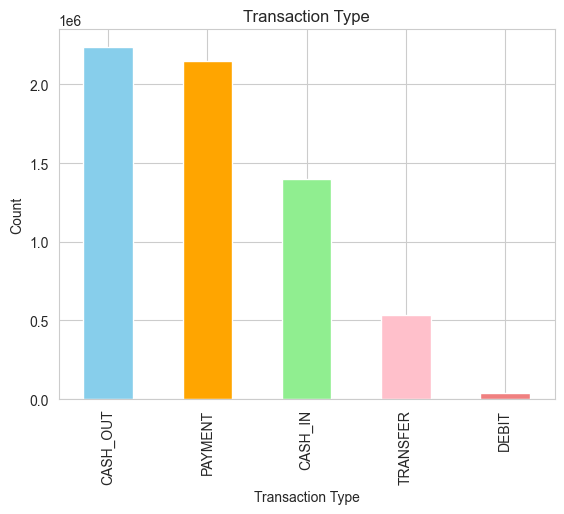

In [17]:
df['type'].value_counts().plot(kind='bar', title='Transaction Type', color=['skyblue', 'orange', 'lightgreen', 'pink', 'lightcoral', 'lightgrey'   ])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

2. Fraud Rate by Type

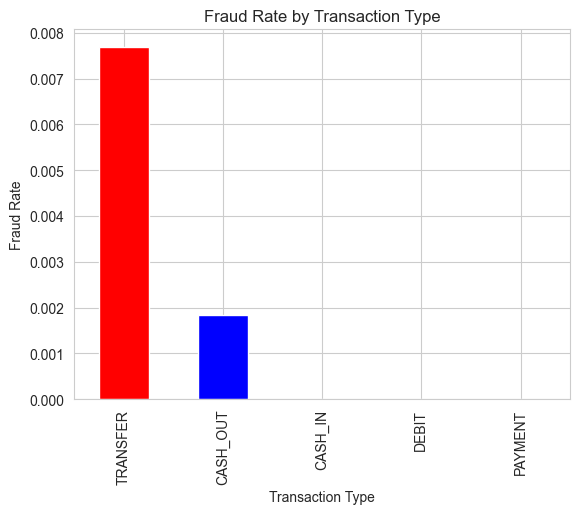

In [18]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color=['red', 'blue', 'green', 'orange', 'purple', 'brown'])
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

Amount Statistics

In [20]:
df['amount'].describe().astype(np.int64)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

Findings: 
count     6,362,620   → You have about 6.3 million transactions in total.
mean        179,861   → On average, each transaction is about $179k.
std         603,858   → The spread (variation) is HUGE — many transactions are far from the average.
min              0    → The smallest transaction is 0 (maybe test or failed transactions).
25%         13,389    → 25% of transactions are below $13k.
50%         74,871    → 50% are below $74k (this is the median).
75%        208,721    → 75% are below $208k.
max     92,445,516    → The largest transaction is ~92 million!

<!-- ------------------------------------------------------------------ -->
What this tells us :

a. Most transactions are relatively small (tens of thousands), but…
b. There are a few very large transactions (in the millions) that pull the average way up.
c. That’s why the mean (179k) is much bigger than the median (74k) → the data is skewed by huge values (outliers).

Why it matters in ML?:
- ML models can get confused by extreme outliers (like that 92 million).

Get Historgram of the above

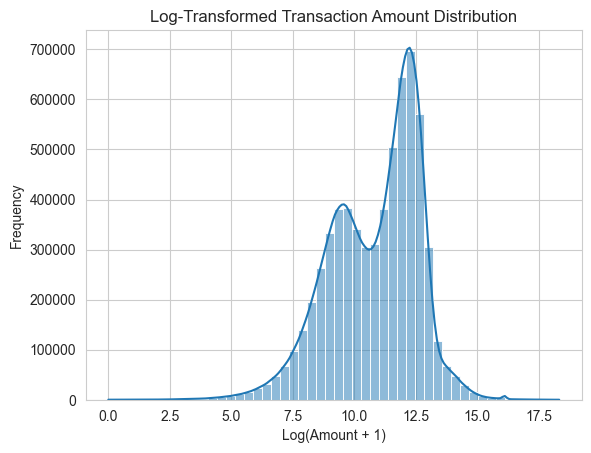

In [21]:
sns.histplot(np.log1p(df['amount']), bins=50, kde=True)
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

If you try to make a normal histogram (without log), the chart gets squished:
 - All the small transactions bunch up on the left.
 - The giant $10M ones stretch the scale so much that the small ones almost disappear.

What np.log1p(df['amount']) does?
 - It applies a logarithm to each amount (like zooming out on a big map).
 - Logarithm makes big numbers shrink more than small ones.
<!-- --------------------------------------------------------------------------------------->
The purpose of log-transforming transaction amounts:

Without log:
Imagine a classroom where 99 students are between 4–6 feet tall, but 1 student is 100 feet tall.
If you make a height chart, that one giant makes the chart useless — everyone else looks the same squished at the bottom.

With log:
You “shrink” the giant student so they’re more in line with the rest. Now you can see differences among the normal students clearly.

<!-- -------------------------------------------------------------------------------------------------->
In ML terms:
 - Real-world money data has a few giant values and lots of normal ones.
 - The giant values can confuse the model.
 - Log transformation makes the scale fairer, so the model learns patterns from all data, not just the outliers.

Let see transaction amount less than 50K is Fraud

Text(0.5, 1.0, 'Transaction Amount by Fraud Status (Amounts < $50,000)')

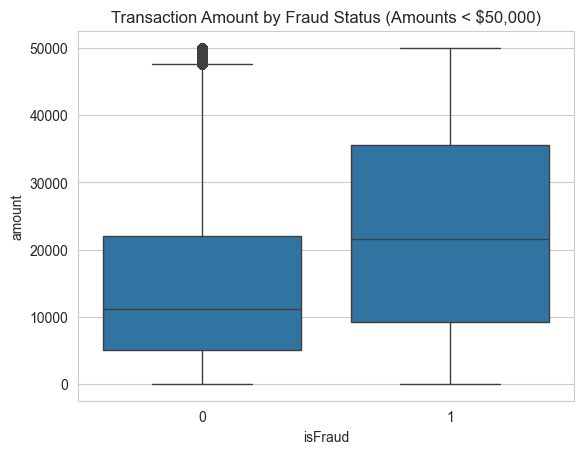

In [ ]:
sns.boxplot(data=df[df["amount"] < 50000], x='isFraud', y='amount')
plt.title('Transaction Amount by Fraud Status (Amounts < $50,000)')
plt.show()

This chart is like putting fraud and non-fraud transactions side by side to see how much money is usually involved

In [23]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]


creating new columns from existing ones --> Feature Engineering

In [27]:
(df["balanceDiffOrig"] < 0).sum()

np.int64(1399253)

In [28]:
(df["balanceDiffDest"] < 0).sum()

np.int64(2806464)

What it means

-    oldbalanceOrg → the sender’s balance before the transaction.
-    newbalanceOrig → the sender’s balance after the transaction.
        -    Their difference = how much money left the sender’s account.
        -    That’s saved in a new column balanceDiffOrig.
-    oldbalanceDest → the receiver’s balance before the transaction.
-    newbalanceDest → the receiver’s balance after the transaction.
        -    Their difference = how much money arrived in the receiver’s account.
        -    That’s saved in balanceDiffDest.

In [29]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


we can note column "step" it is getting increased by 1, we can plot and drop it.

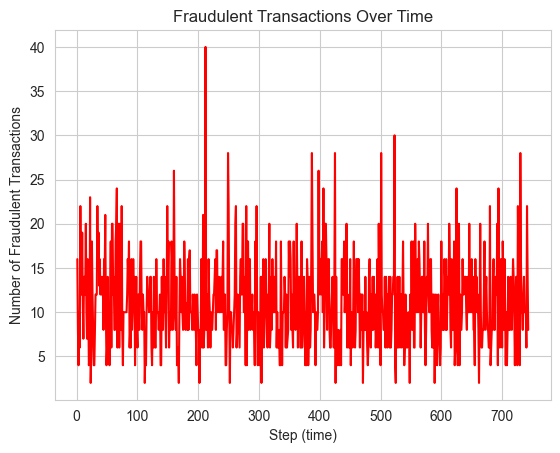

In [30]:
frauds_per_steps = df[df['isFraud'] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_steps.index, frauds_per_steps.values, label='Fraudulent Transactions', color='red')
plt.xlabel('Step (time)')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions Over Time')
plt.grid(True)
plt.show()

Step by step:
    df[df['isFraud'] == 1]

Filter the dataset → keep only rows where the transaction is marked as fraud.
    ["step"].value_counts()

Count how many fraudulent transactions happened in each time step.
    (step is usually a unit of time in the dataset — e.g., 1 step = 1 hour).
        .sort_index()

Sort the counts by time order (step 1, step 2, step 3 …).
        plt.plot(...)

Plot fraud counts over time.
    X-axis = time steps.
    Y-axis = how many frauds happened at that time.
    Line color = red for fraud.

Purpose of this plot:
    To see when fraud happens in the timeline.
    Helps answer questions like:
    Are frauds evenly spread over time?
    Do frauds spike at certain periods (e.g., night time, weekends, specific step ranges)?
    Is fraud increasing over time (suggesting worsening attacks) or decreasing (maybe due to detection systems)?

In [31]:
df.drop(columns="step", inplace=True)

Let's go with Customer Wise, find out customers which makes the highest amount of transaction like top senders and top receivers 

In [32]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [33]:
#Top senders
top_senders = df['nameOrig'].value_counts().head(10)

In [34]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [35]:
#Top receivers
top_receivers = df['nameDest'].value_counts().head(10) 
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

Who are the top 10 people/accounts that got the most money transfers?
It helps spot popular or suspicious receivers.

In [36]:
#Fraud making users
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [37]:
fraud_types = df[df['type'].isin(["TRANSFER", "CASH_OUT"])]
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [38]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

<module 'matplotlib.pyplot' from 'd:\\GEN AI\\Projects\\FMS\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

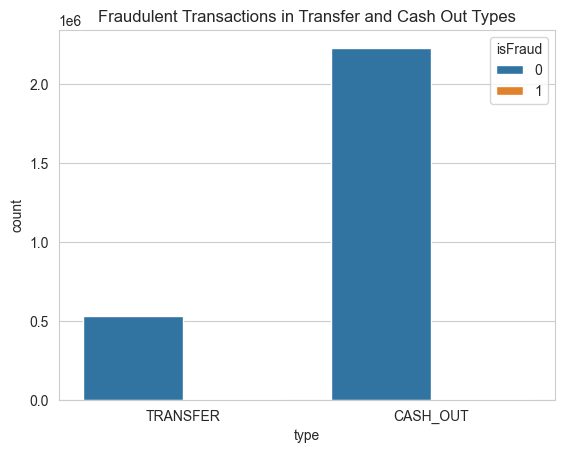

In [39]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraudulent Transactions in Transfer and Cash Out Types')
plt

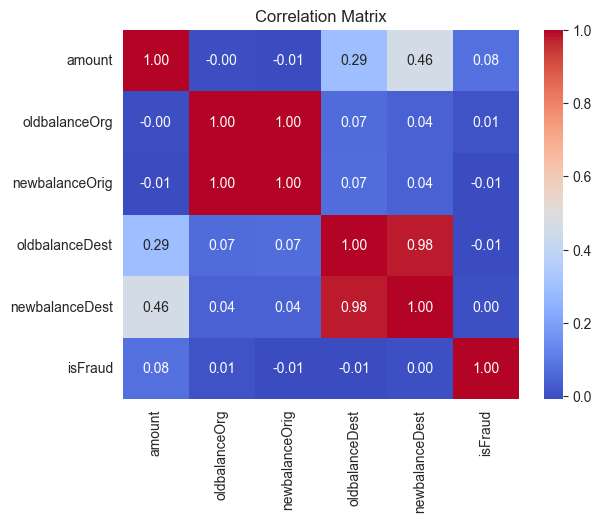

In [40]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Customers have zero amount after transfer

In [41]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

In [42]:
len(zero_after_transfer)

1188074

These are suspicious records

In [43]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


FEATURE SELECTION AND PREPRATION STEP

In [44]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


Drop some column

In [46]:
df_model = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

In [47]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [48]:
categorial_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [49]:
y = df_model['isFraud']
X = df_model.drop('isFraud', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop="first"), categorial_features)
    ],
    remainder= 'drop'
)

In [54]:
#Model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced',max_iter=1000))])
    #------> Note if we will not set class_weight='balanced' the model 
    # will be biased towards non-fraud class, since the dataset is highly imbalanced. 99% of the transactions are non-fraudulent.


In [55]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [57]:
y_pred = pipeline.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



Findings: 
What the numbers mean
    Class 0 → Not Fraud (the majority)

        Precision: 1.00 → Almost every time the model predicts "Not Fraud," it’s correct.

        Recall: 0.94 → It catches 94% of the actual non-fraud cases (misses 6%).

        F1: 0.97 → Strong overall performance here.

    Class 1 → Fraud (the minority)

        Precision: 0.02  → Only 2% of the transactions flagged as fraud are actually fraud → huge false positive problem.

        Recall: 0.95 → Model catches 95% of all frauds.

        F1: 0.04 → Very low overall balance between precision & recall.

    Overall

        Accuracy: 0.94 → Seems high, but misleading because the dataset is imbalanced (most transactions are non-fraud).

        Macro avg (balanced view): Precision = 0.51, Recall = 0.95, F1 = 0.51.

        Weighted avg (skewed by majority class): Looks great (0.97 F1), but that’s because non-fraud dominates.

        What this really says

            The model is super sensitive → it calls nearly every possible fraud a fraud.

            That’s why recall for fraud is high (0.95) but precision is terrible (0.02).

        In practice:

            It catches almost all frauds 

            But it falsely flags a huge number of normal transactions

In [59]:
array = confusion_matrix(y_test, y_pred)
array

array([[1801236,  105086],
       [    127,    2337]])

In [61]:
#Accuracy
pipeline.score(X_test, y_test) * 100

94.48796250601167

In [62]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']